In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Apartado 1

In [54]:
data_path = Path("Apartado1")

data_energy = pd.read_csv(data_path / 'ini-ene.his', sep=r'\s+', skiprows=1, header=None)
data_energy.columns = ['Energia', 'Prob', 'Error']

In [55]:
elemento = 'Rubidio 82'
# Numero masico y atomico
Z = 82
A = 37
# Energia en MeV
E = 3.38

# Calculos
C = data_energy['Prob'].sum()

media = (data_energy['Energia']*data_energy['Prob']).sum()/C

err_media = np.sqrt((data_energy['Energia']**2*data_energy['Error']**2).sum())/C

print('Elemento:', elemento)
print('Media:', media)
print('Error media:', err_media)

Elemento: Rubidio 82
Media: 1535.7724565341996
Error media: 5.285812277907206


Text(0.5, 1.0, 'Distribución de energía del Rubidio 82')

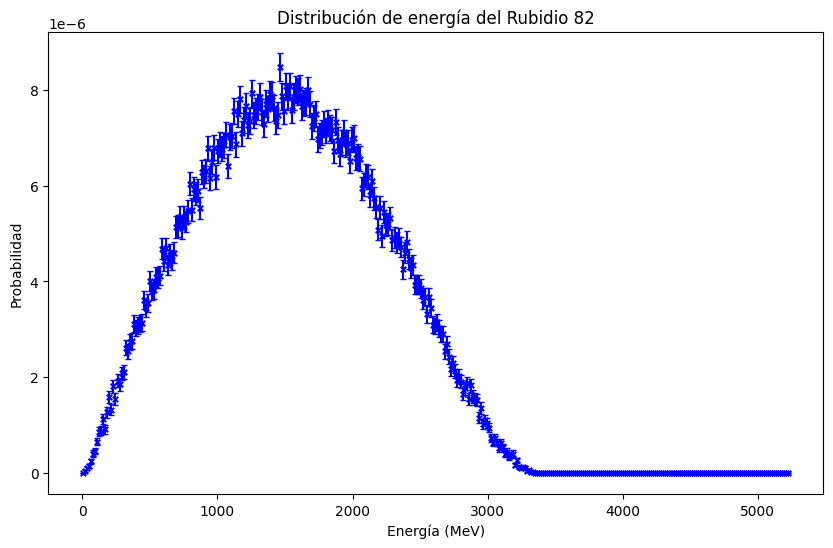

In [69]:
plt.figure(figsize=(10, 6))
plt.errorbar(data_energy['Energia'], data_energy['Prob'], yerr=data_energy['Error'], fmt='None', capsize=2, color='blue')
plt.scatter(data_energy['Energia'], data_energy['Prob'], color='blue', label='Datos', s=15, marker='x')
plt.xlabel('Energía (MeV)')
plt.ylabel('Probabilidad')
plt.title(f'Distribución de energía del {elemento}')

In [39]:
def move_data(dest_path):
	his_files = list(data_path.glob('*.his'))
	sal_files = list(data_path.glob('*.SAL'))
	out_files = list(data_path.glob('*.out'))

	for file in his_files + sal_files + out_files:
		file.rename(dest_path / file.name)

	return

In [70]:
simbolo = elemento[0] + 'b' + elemento[-2:]
dest_path = Path("Apartado1/" + simbolo)
dest_path.mkdir(exist_ok=True)
input_text = dest_path / 'input_data.txt'
with open(input_text, 'w') as file:
	file.write(f'Elemento = {elemento}\n')
	file.write('\n*************************************\n')
	file.write('Elemento padre:\n')
	file.write(f'Z = {Z}\n')
	file.write(f'A = {A}\n')
	file.write('\nElemento hijo:\n')
	file.write(f'Z = {Z}\n')
	file.write(f'A = {A-1}\n')
	file.write('\nEnergia en la transicion\n')
	file.write(f'E = {E} MeV\n')
	file.write('\n*************************************\n')

	file.write('\nResultados\n')
	file.write(f'Media: {media}\n')
	file.write(f'Error media: {err_media}')
	
move_data(dest_path)